# K means Clustering

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


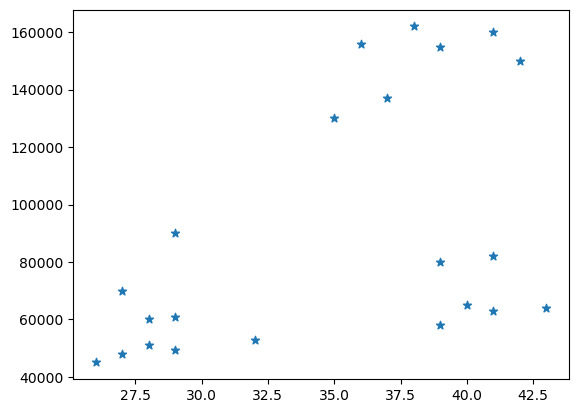

In [3]:
plt.scatter(df.Age, df['Income($)'], marker='*')

In [4]:
km = KMeans(n_clusters=3, n_init=10)
km

KMeans(n_clusters=3, n_init=10)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [7]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

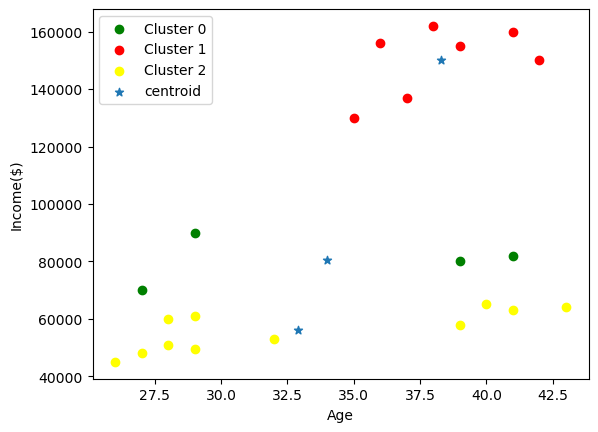

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='yellow', label='Cluster 2')
# To plot centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [9]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [10]:
km = KMeans(n_clusters=3, n_init=10)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [11]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [12]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

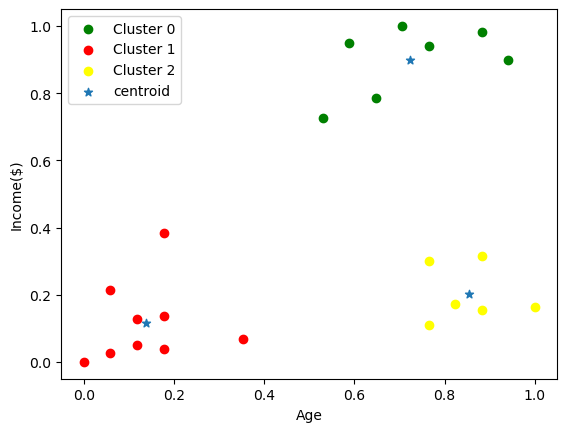

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='yellow', label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [14]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [15]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22624835214667535,
 0.1685851223602976,
 0.13265419827245162,
 0.10912213103862767]

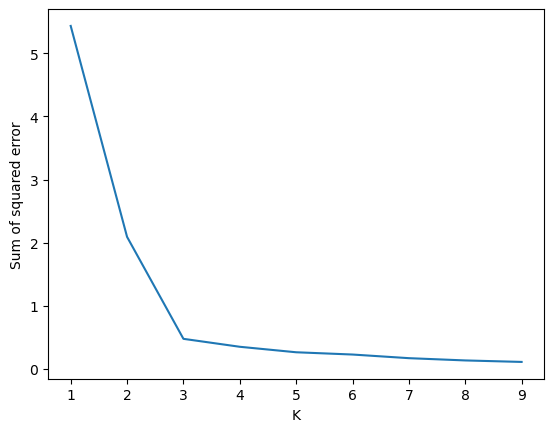

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

### Another Task

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [17]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [19]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
iris_df['flower'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
# Using only petal width and length
iris_df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis='columns', inplace=True)

In [22]:
iris_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [23]:
km = KMeans(n_clusters=3, n_init=10)
predicted = km.fit_predict(iris_df)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
iris_df['cluster'] = predicted
iris_df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [26]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [27]:
data1 = iris_df[iris_df.cluster==0]
data2 = iris_df[iris_df.cluster==1]
data3 = iris_df[iris_df.cluster==2]

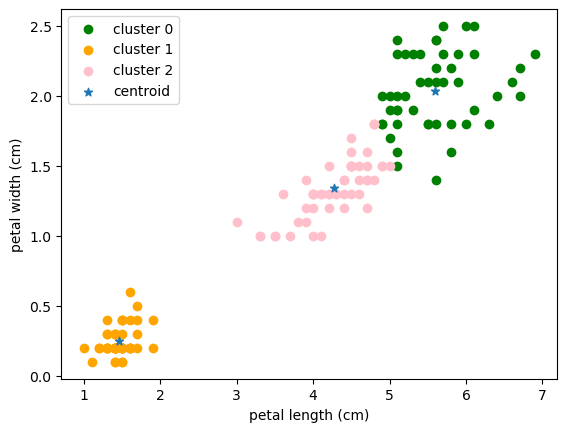

In [28]:
plt.scatter(data1['petal length (cm)'], data1['petal width (cm)'], color='green', label='cluster 0')
plt.scatter(data2['petal length (cm)'], data2['petal width (cm)'], color='orange', label='cluster 1')
plt.scatter(data3['petal length (cm)'], data3['petal width (cm)'], color='pink', label='cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', label='centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

<b>Elbow Plot</b>

In [29]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(iris_df)
    sse.append(km.inertia_)

In [30]:
sse

[650.7886666666667,
 186.27970291146764,
 31.371358974358966,
 22.649637861231323,
 14.193126322751322,
 11.415117424242423,
 9.281343349632822,
 7.808610729311969,
 6.881864273153743]

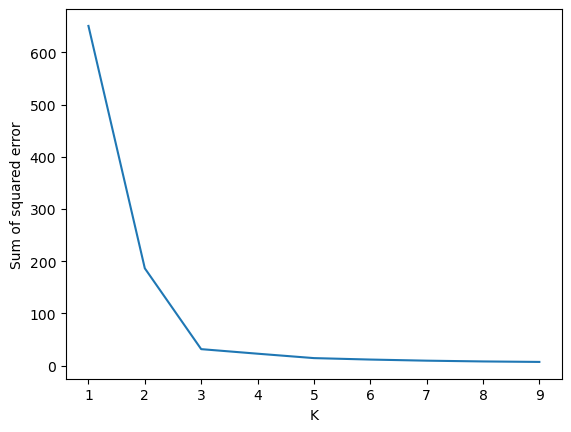

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10), sse)